<!-- # <p style="background-color:#FF7F50;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Importing Libraries</p> -->
# Importing Libraries

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
import lightgbm as lgb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

<!-- # <p style="background-color:#FF7F50;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Loading Data</p> -->
# Loading Data

In [2]:
data=pd.read_csv("/kaggle/input/data-set/dataTH1.csv" ,encoding="latin-1",sep=";")
#df=df.drop("id",axis=1)
print(data)

           Ngày       1       2       3       4       5       6       7  \
0    01/01/2021   964.4   964.4   964.4   964.4   964.4   964.4   964.4   
1    01/02/2021  1019.7  1019.7  1019.7  1019.7  1019.7  1019.7  1019.7   
2    01/03/2021   988.4   988.4   988.4   988.4   988.4   988.4   988.4   
3    01/04/2021  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0   
4    01/05/2021  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5   
..          ...     ...     ...     ...     ...     ...     ...     ...   
360  27/12/2021  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0   
361  28/12/2021  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0   
362  29/12/2021  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5   
363  30/12/2021  1022.6  1022.6  1022.6  1022.6  1022.6  1022.6  1022.6   
364  31/12/2021  1022.6  1022.6  1022.6  1022.6  1022.6  1022.6  1022.6   

          8       9  ...      39      40      41      42      43      44  \
0     964.4   964.4  ..

In [ ]:
msv = 2151268039
col1 = msv%16 + 1
col2 = msv%16 + 2
col3 = msv%16 + 3
dulieu = data[[str(col1),str(col2),str(col3)]]
dulieu.head(5)


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [ ]:
# Lấy dữ liệu từ cột được chọn
selected_data = data.iloc[:, col]

In [ ]:
# Biểu đồ boxplot cho phân phối và giá trị ngoại lệ của cột col1
plt.figure(figsize=(6, 4))
plt.boxplot(data_34[str(col1)])
plt.title(f'Biểu đồ Boxplot của {col1}')
plt.ylabel('Giá trị')
plt.show()
# Biểu đồ boxplot cho phân phối và giá trị ngoại lệ của cột col2
plt.figure(figsize=(6, 4))
plt.boxplot(data_34[str(col2)])
plt.title(f'Biểu đồ Boxplot của {col2}')
plt.ylabel('Giá trị')
plt.show()

# Biểu đồ Line Plot cho col1 và col2
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(data_34[str(col1)])
plt.title(f'Biểu đồ Line Plot của {str(col1)}')

plt.subplot(1, 2, 2)
plt.plot(data_34[str(col2)])
plt.title(f'Biểu đồ Line Plot của {str(col2)}')

plt.tight_layout()
plt.show()

In [ ]:
# Biểu đồ Violin Plot cho col1 và col2
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.violinplot(data_34[str(col1)], vert=False)
plt.title(f'Biểu đồ Violin Plot của {str(col1)}')
plt.xlabel('Giá trị')
plt.ylabel(str(col1))

plt.subplot(1, 2, 2)
plt.violinplot(data_34[str(col2)], vert=False)
plt.title(f'Biểu đồ Violin Plot của {str(col2)}')
plt.xlabel('Giá trị')
plt.ylabel(str(col2))

plt.tight_layout()
plt.show()

In [ ]:
#Tach data

from yellowbrick.cluster import KElbowVisualizer
print('TÌm cụm tối ưu Kmeans')
selected_data_2d = selected_data.values.reshape(-1, 1)
kmeans = KMeans(random_state=23, n_init=10)
Elbow_M = KElbowVisualizer(kmeans, k=(2, 12))

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
print('TÌm cụm tối ưu Kmeans')
selected_data_2d = selected_data.values.reshape(-1, 1)
kmeans = KMeans(random_state=23, n_init=10)
Elbow_M = KElbowVisualizer(kmeans, k=(2, 12))
Elbow_M.fit(selected_data_2d)
Elbow_M.show()

In [ ]:
k = 5
# Thực hiện Gaussian Mixture Model
gmm = GaussianMixture(n_components=k) # Số components có thể điều chỉnh
gmm.fit(selected_data.values.reshape(-1, 1))
gmm_labels = gmm.predict(selected_data.values.reshape(-1, 1))
# Thực hiện KMeans clustering
kmeans = KMeans(n_clusters=k, n_init=10) # Số clusters có thể điều chỉnh
kmeans.fit(selected_data.values.reshape(-1, 1))
kmeans_labels = kmeans.predict(selected_data.values.reshape(-1, 1))
# Thực hiện DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) # Tham số có thể điều chỉnh
dbscan_labels = dbscan.fit_predict(selected_data.values.reshape(-1, 1))
# In ra kết quả của mỗi mô hình
print("Gaussian Mixture Model labels:")
print(gmm_labels)
print("\nKMeans labels:")
print(kmeans_labels)
print("\nDBSCAN labels:")
print(dbscan_labels)
# Mô tả kịch bản tách dữ liệu
print("\nKịch bản tách data:")
print("Dữ liệu được đọc từ tệp CSV 'Gia SMP va SMPcap 2021(Giá thị trường SMP).csv'.")
print(f"Chọn cột số {col} để phân tích.")
print("Sử dụng Gaussian Mixture Model với số components là 2, KMeans clustering với số clusters là 2, và DBSCAN để phân tích dữ liệu.")

In [ ]:
import matplotlib.pyplot as plt
# Biểu đồ Gaussian Mixture Model
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.scatter(range(len(selected_data)), selected_data, c=gmm_labels, cmap='viridis')
plt.title('Gaussian Mixture Model')
# Biểu đồ KMeans
plt.subplot(1, 3, 2)
plt.scatter(range(len(selected_data)), selected_data, c=kmeans_labels, cmap='viridis')
plt.title('KMeans')
# Biểu đồ DBSCAN
plt.subplot(1, 3, 3)
plt.scatter(range(len(selected_data)), selected_data, c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN')
plt.tight_layout()
plt.show()

<!-- [AmbrosM](https://www.kaggle.com/code/ambrosm/tpsjul22-gaussian-mixture-cluster-analysis) suggested some features are just not as useful as others.
> I'll be using all the integer features i.e from **(f_07, ... ,f_13)** & continuos features **(f_22 ,... ,f_28)**. -->

Thực Hành buổi 3Kalman

In [ ]:
msv = 2151268039
col1 = msv%16 + 1
col2 = msv%16 + 2
col3 = msv%16 + 3
dulieu = data[[str(col1),str(col2),str(col3)]]
dulieu.head(5)

In [ ]:
dulieu['date'] = data['Ngày']
dulieu['date'] = pd.to_datetime(dulieu['date'], format='%d/%m/%Y')

In [ ]:
dulieu

In [ ]:
#EDA

In [ ]:
# Xem thông tin tổng quan về dữ liệu
print("Thông tin tổng quan về dữ liệu:")
dulieu.info()

In [ ]:
#Thống kê mô tả của dữ liệu
print("\nThống kê mô tả của dữ liệu:")
dulieu.describe()

In [ ]:
# Kiểm tra giá trị thiếu trong dữ liệu
print("\nKiểm tra giá trị thiếu trong dữ liệu:")
dulieu.isnull().sum()

In [ ]:
# trực quan hóa
dulieu_corr = data[[str(col1),str(col2),str(col3)]].corr()
sns.heatmap(dulieu_corr, annot=True, cmap="crest")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(ax=ax, data=dulieu, x="date", y=str(col1), label=col1, color ='blue')
plt.title('Lineplot')
plt.legend()
plt.show()

In [ ]:
fig, axes = plt.subplots(figsize=(10, 4))
sns.histplot(data=dulieu, x=str(col1), bins= 10, kde=True, color ='b', ax = axes)
axes.set_title(f'Histogram cột {col1}')
plt.show()

In [ ]:
fig, axes = plt.subplots(figsize=(10, 4))
# Biểu đồ 1
sns.boxplot(data=dulieu, x=str(col1), color ='b', ax=axes)
axes.set_title(f'Boxplot cột {col1}')
plt.show()

Kalman

In [ ]:
from pykalman import KalmanFilter

# Khởi tạo bộ lọc Kalman
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)


In [ ]:
# Áp dụng bộ lọc Kalman cho từng cột dữ liệu
dulieu[f'{col1}_kalman'] = kf.smooth(dulieu[str(col1)].values)[0]
dulieu[f'{col2}_kalman'] = kf.smooth(dulieu[str(col2)].values)[0]
dulieu[f'{col3}_kalman'] = kf.smooth(dulieu[str(col3)].values)[0]

In [ ]:
# Trực quan hóa kết quả sau khi áp dụng bộ lọc Kalman
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(ax=ax, data=dulieu, x="date", y=str(col1), label=col1, color ='b')
sns.lineplot(ax=ax, data=dulieu, x="date", y=f'{col1}_kalman', label=f'{col1}_kalman', color ='r')
plt.title('Data with Kalman Filter')
plt.legend()
plt.grid(True)
plt.show()

arima


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Chọn một cột dữ liệu để dự đoán (ví dụ col1)
series = dulieu[f'{col1}_kalman']

# Kiểm tra tính dừng của dữ liệu bằng ADF test
result = adfuller(series.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
# Nếu dữ liệu không dừng (p-value > 0.05), thực hiện vi phân
if result[1] > 0.05:
    series = series.diff().dropna()

# Xác định tham số p và q bằng ACF và PACF plots (có thể sử dụng visual inspection hoặc grid search)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(series, ax=axes[0])
plot_pacf(series, ax=axes[1])
plt.show()

In [ ]:
# Khởi tạo và đào tạo mô hình ARIMA
model = ARIMA(series, order=(5, 1, 7))  # Thay đổi order nếu cần thiết
model_fit = model.fit()

# Tóm tắt mô hình
print(model_fit.summary())

# Dự báo
forecast_steps = 7  # Số bước dự báo
forecast = model_fit.forecast(steps=forecast_steps)

In [ ]:
predicted_dates = np.arange(len(series), len(series) + len(forecast))

plt.figure(figsize=(10, 5))
plt.plot(series, label='Actual Price')
plt.plot(np.arange(len(series), len(series) + len(forecast)), forecast, label='ARIMA Predicted - Next 7 Days', marker='*')
plt.xlabel('Days')
plt.ylabel('Values')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()

# Thực Hành 4 Ngày 31/5

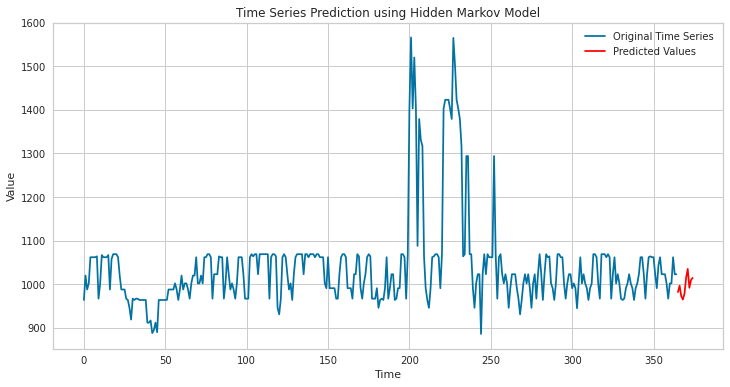

In [3]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt

# Chọn cột đầu tiên của giá trị làm chuỗi thời gian
time_series = data["1"].values

# Chuyển đổi chuỗi thời gian thành định dạng mà HMM có thể sử dụng
# HMM yêu cầu dữ liệu phải ở định dạng số nguyên, nên chúng ta sẽ làm tròn các giá trị
time_series = np.round(time_series).astype(int).reshape(-1, 1)

# Khởi tạo mô hình HMM với số lượng trạng thái ẩn
model = hmm.GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000)

# Huấn luyện mô hình HMM
model.fit(time_series)

# Dự báo giá trị tương lai
# Số lượng bước dự báo
n_steps = 10

# Sử dụng trạng thái cuối cùng để dự báo giá trị tương lai
last_value = time_series[-1].reshape(1, -1)
predictions = []

for _ in range(n_steps):
    next_value = model.sample(1)[0]
    predictions.append(next_value[0])
    last_value = next_value

# Vẽ biểu đồ chuỗi thời gian gốc và giá trị dự báo
plt.figure(figsize=(12, 6))
plt.plot(range(len(time_series)), time_series, label="Original Time Series")
plt.plot(range(len(time_series), len(time_series) + n_steps), predictions, label="Predicted Values", color='red')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Time Series Prediction using Hidden Markov Model")
plt.show()

In [ ]:
pca = PCA(n_components=3,random_state=1)
pca.fit(X)
PCA_ds = pd.DataFrame(pca.transform(df[feats]), columns=(["col1","col2","col3"]))
PCA_ds.describe().T

In [ ]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Elbow Method to determine optimum number of clusters to be formed:
> `7 clusters` gives the best results on leaderboard.

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=23), k=(4,12))
Elbow_M.fit(X)
Elbow_M.show()

# Bayesian Gaussian Mixture 

In [ ]:
BGM = BayesianGaussianMixture(n_components=7,covariance_type='full',random_state=1,n_init=15)
# fit model and predict clusters
preds = BGM.fit_predict(X)
PCA_ds["Clusters"] = preds
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= preds


# Creating a classifier
> Training a LGBM model from the clusters predicted from Bayessian Gaussian Mixture

In [ ]:
pp=BGM.predict_proba(X)# Calcualting the probabilities of each prediction
df_new=pd.DataFrame(X,columns=feats) 
df_new[[f'predict_proba_{i}' for i in range(7)]]=pp # creating new dataframe columns of probabilites 
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)
    
train_index=np.array([])
for n in range(7):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.68)].index
    train_index = np.concatenate((train_index, n_inx))

In [ ]:
#ricopue's notebook's code snippet
from sklearn.model_selection import StratifiedKFold
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7} 

model_list=[]

gkf = StratifiedKFold(11)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):   

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)
    
    model = lgb.train(params = params_lgb, 
                train_set = tr_dataset, 
                valid_sets =  vl_dataset, 
                num_boost_round = 5000, 
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])  
    
    model_list.append(model) 

In [ ]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])

In [ ]:
labels=np.argmax(lgb_preds,axis=1)


In [ ]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1, projection='3d', label="bla")
ax.scatter(PCA_ds['col1'],PCA_ds['col2'],PCA_ds['col3'], s=40, marker='o', cmap = 'rainbow' )
ax.set_title("Before clustering")
ax = plt.subplot(1,2,2, projection='3d', label="bla")
ax.scatter(PCA_ds['col1'],PCA_ds['col2'],PCA_ds['col3'], s=40, c=PCA_ds["Clusters"], marker='o',cmap="rainbow")
ax.set_title("After Clustering")
plt.show()


In [ ]:
ss.Predicted=np.argmax(lgb_preds,axis=1)

# Ploting the count plot for cluster distribution

In [ ]:
pl = sns.countplot(x=np.argmax(lgb_preds,axis=1))
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
ss.to_csv("submission.csv",index=False)